# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [5]:
xci <- data.table::fread("../../_m/xci_enrichment_analysis_3brainRegions.txt")
xci %>% filter(Bonferroni < 0.05)

Tissue,XCI status,OR,PValue,Direction,Bonferroni
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Caudate,escape,52.541253,3.525156e-37,All,3.172640e-36
Caudate,variable,5.687289,1.018592e-03,All,9.167329e-03
Caudate,escape,136.346071,1.182377e-42,Female Bias,1.064139e-41
Caudate,variable,13.068562,8.613979e-05,Female Bias,7.752581e-04
DLPFC,escape,29.157326,2.319487e-28,All,2.087538e-27
DLPFC,escape,7.182445,3.797823e-03,Male Bias,3.418041e-02
DLPFC,escape,58.037037,6.541881e-30,Female Bias,5.887693e-29
Hippocampus,escape,148.678385,2.768297e-41,All,2.491467e-40
Hippocampus,escape,32.317784,2.362670e-03,Male Bias,2.126403e-02


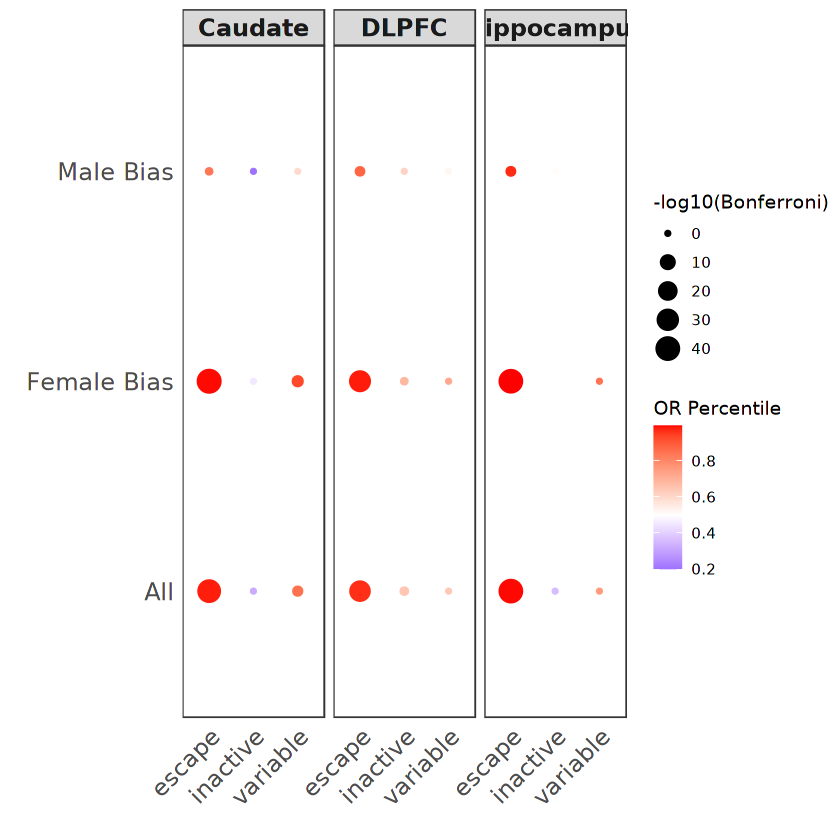

In [11]:
dotplot <- xci %>% 
    mutate(`-log10(Bonferroni)` = -log10(Bonferroni), `OR Percentile` = OR / (1+OR)) %>% 
    filter(OR > 0) %>% 
    ggplot(aes(x=`XCI status`, y=Direction, color=`OR Percentile`, 
               size=`-log10(Bonferroni)`)) + 
    geom_point() + ylab('') + xlab('') + facet_grid(~Tissue) +
    scale_color_gradient2(midpoint = 0.5, low = "blue", mid = "white",
                          high = "red", space = "Lab" ) +
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=14), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=14, face="bold"))
save_plot(dotplot, "dotplot_enrichment_xci", 9, 4)
dotplot

## Repreducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()